In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes

In [2]:
data = pd.read_csv('../0. Data/data_original.csv')

In [3]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data = data.astype('int64')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [7]:
data[data.columns[0:4]] = data[data.columns[0:4]].astype(object)
data[data.columns[5:15]] = data[data.columns[5:15]].astype(object)
data[data.columns[17:22]] = data[data.columns[17:22]].astype(object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Diabetes_012          253680 non-null  object
 1   HighBP                253680 non-null  object
 2   HighChol              253680 non-null  object
 3   CholCheck             253680 non-null  object
 4   BMI                   253680 non-null  int64 
 5   Smoker                253680 non-null  object
 6   Stroke                253680 non-null  object
 7   HeartDiseaseorAttack  253680 non-null  object
 8   PhysActivity          253680 non-null  object
 9   Fruits                253680 non-null  object
 10  Veggies               253680 non-null  object
 11  HvyAlcoholConsump     253680 non-null  object
 12  AnyHealthcare         253680 non-null  object
 13  NoDocbcCost           253680 non-null  object
 14  GenHlth               253680 non-null  object
 15  MentHlth         

In [9]:
num_features = data.select_dtypes('int64').columns

In [10]:
num_features

Index(['BMI', 'MentHlth', 'PhysHlth'], dtype='object')

In [11]:
scaler = preprocessing.MinMaxScaler()

In [12]:
data[num_features] = scaler.fit_transform(data[num_features])

In [13]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,0.325581,1,0,0,0,0,...,1,0,5,0.6,0.500000,1,0,9,4,3
1,0,0,0,0,0.151163,1,0,0,1,0,...,0,1,3,0.0,0.000000,0,0,7,6,1
2,0,1,1,1,0.186047,0,0,0,0,1,...,1,1,5,1.0,1.000000,1,0,9,4,8
3,0,1,0,1,0.174419,0,0,0,1,1,...,1,0,2,0.0,0.000000,0,0,11,3,6
4,0,1,1,1,0.139535,0,0,0,1,1,...,1,0,2,0.1,0.000000,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,0.383721,0,0,0,0,1,...,1,0,3,0.0,0.166667,0,1,5,6,7
253676,2,1,1,1,0.069767,0,0,0,0,0,...,1,0,4,0.0,0.000000,1,0,11,2,4
253677,0,0,0,1,0.186047,0,0,0,1,1,...,1,0,1,0.0,0.000000,0,0,2,5,2
253678,0,1,0,1,0.127907,0,0,0,0,1,...,1,0,3,0.0,0.000000,0,1,7,5,1


In [14]:
kproto = KPrototypes(n_clusters=3, init='random', verbose=1, n_init=1)
clusters = kproto.fit_predict(data.drop('Diabetes_012', axis=1), categorical=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,17,18,19,20])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 53522, ncost: 333532.96247241955
Run: 1, iteration: 2/100, moves: 3554, ncost: 333348.1182012261
Run: 1, iteration: 3/100, moves: 14, ncost: 333348.1176413891
Run: 1, iteration: 4/100, moves: 0, ncost: 333348.1176413891


In [15]:
data_with_clusters = data
data_with_clusters['Clusters'] = clusters

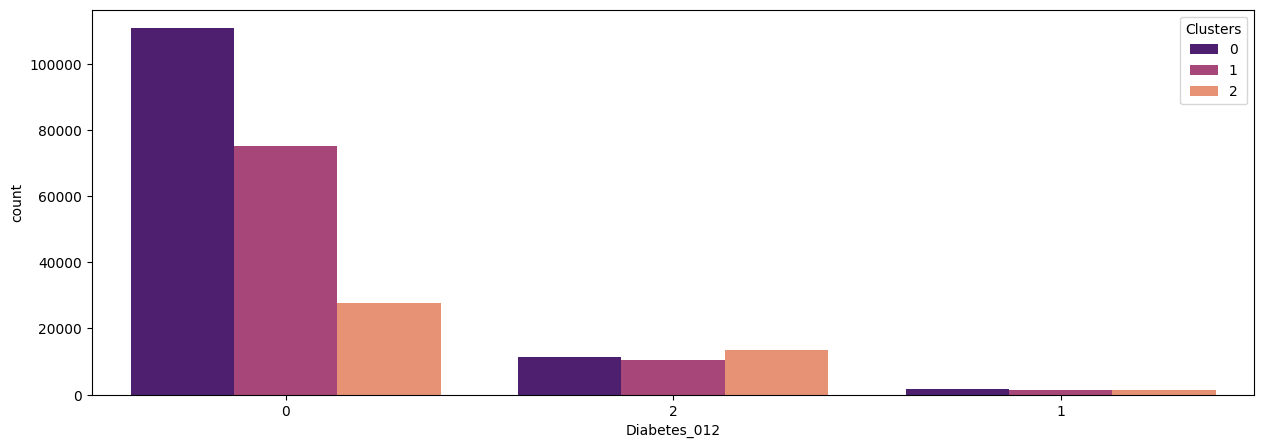

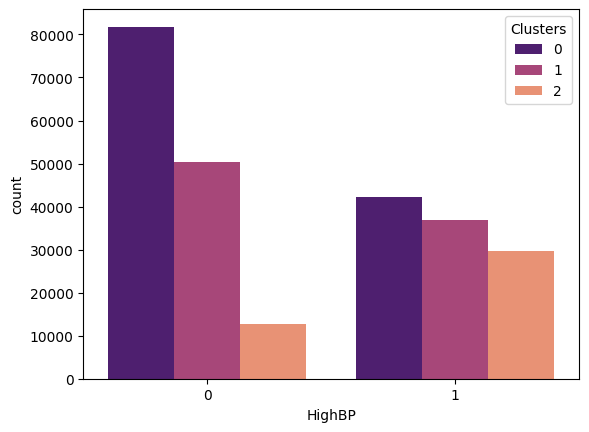

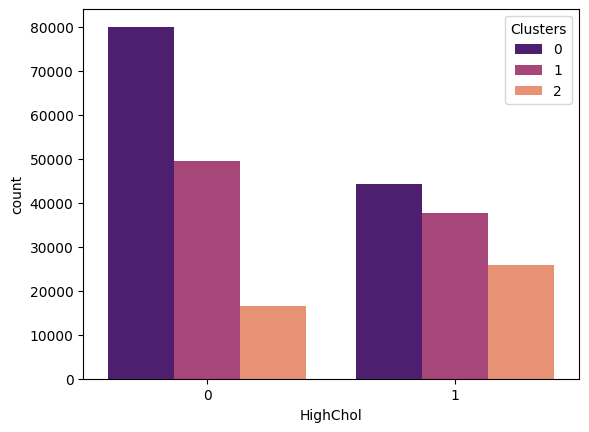

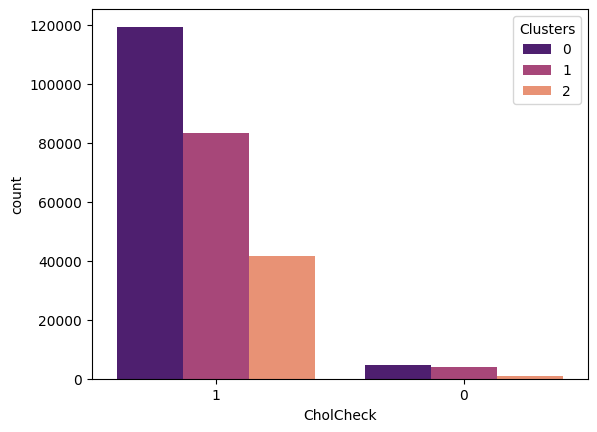

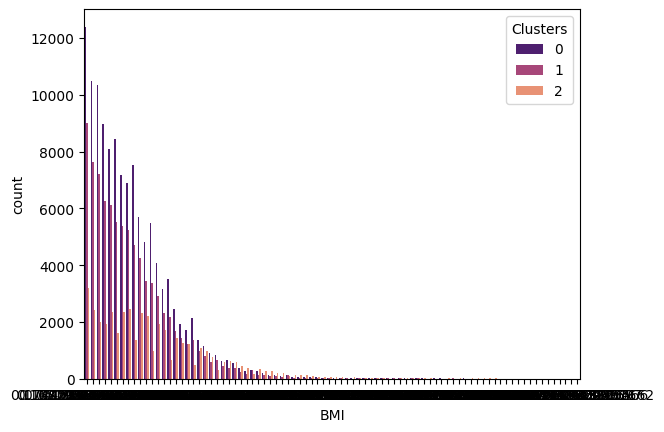

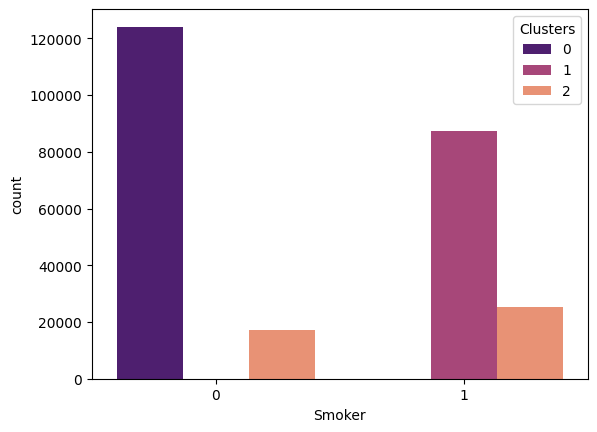

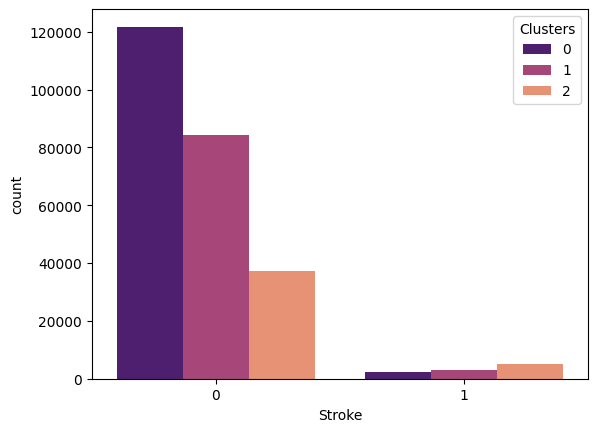

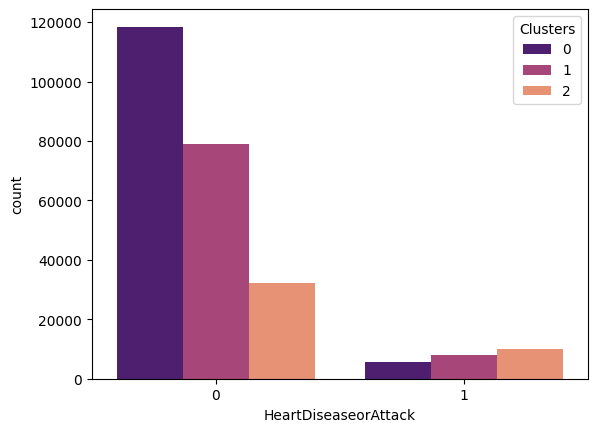

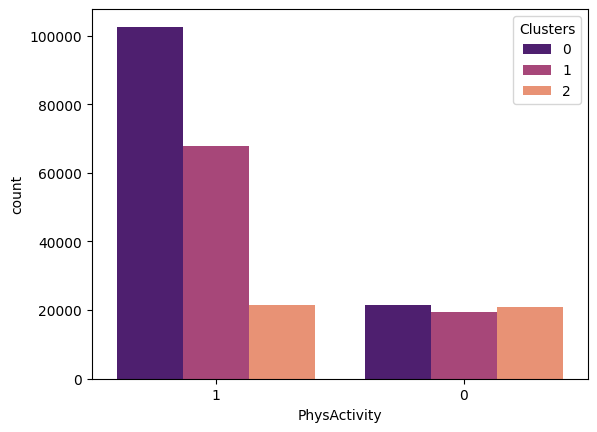

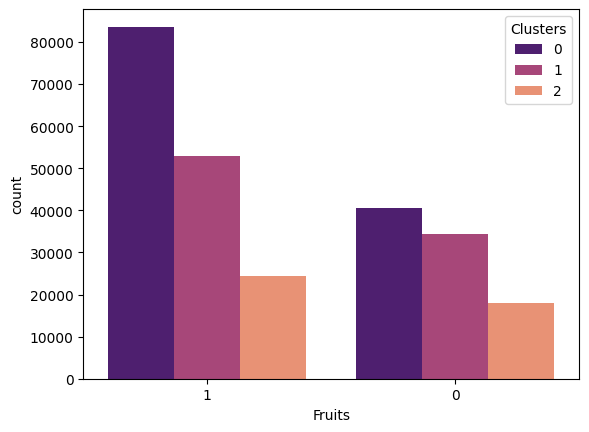

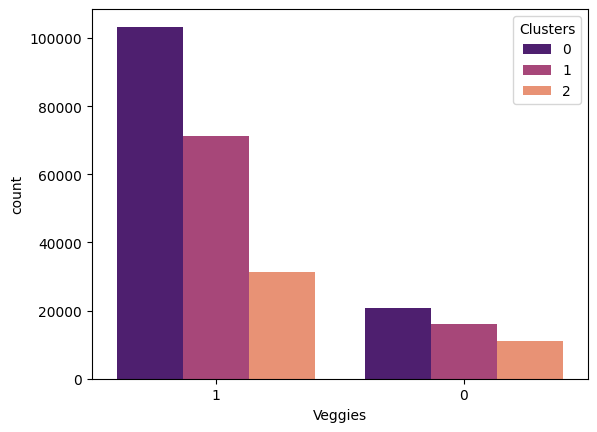

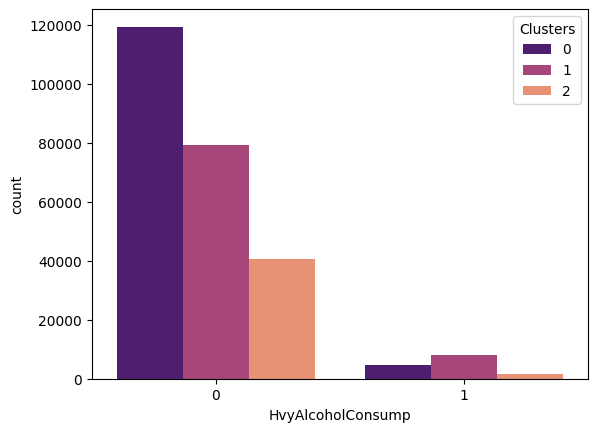

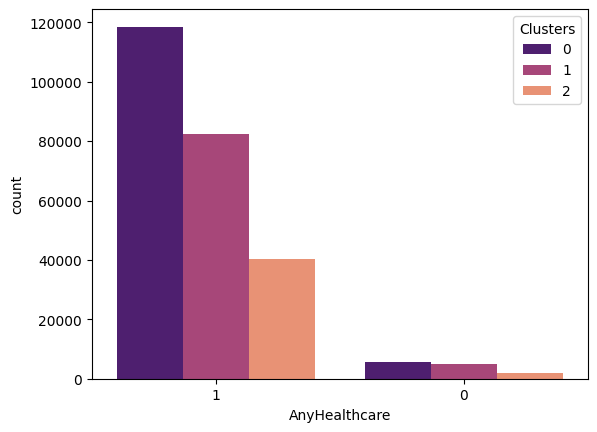

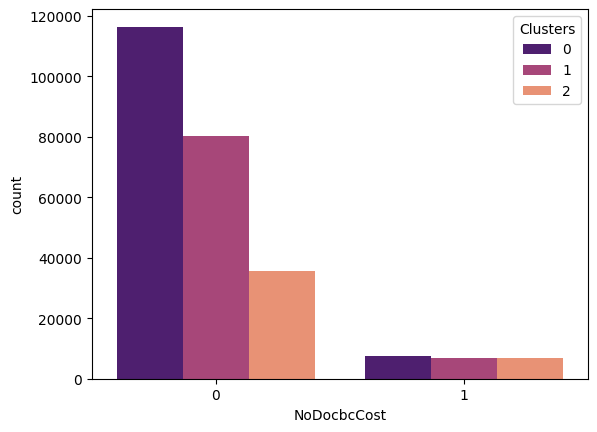

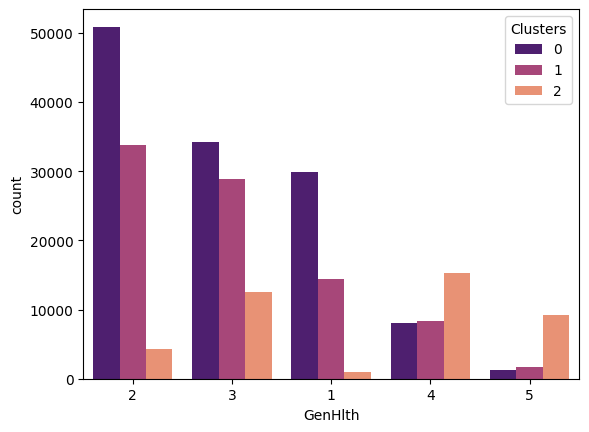

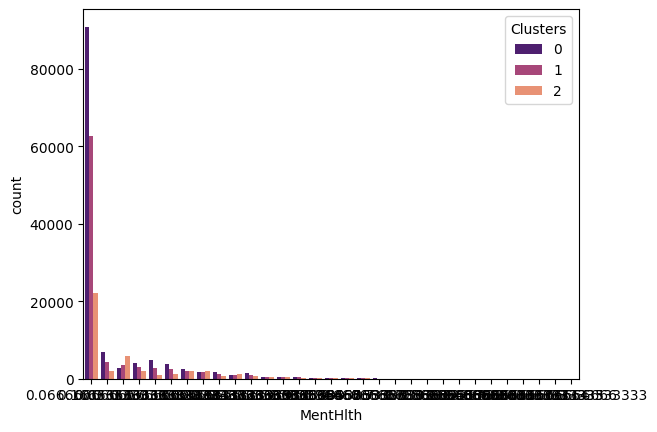

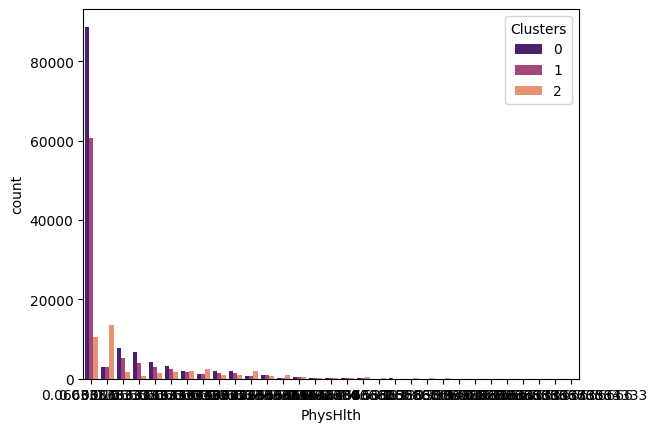

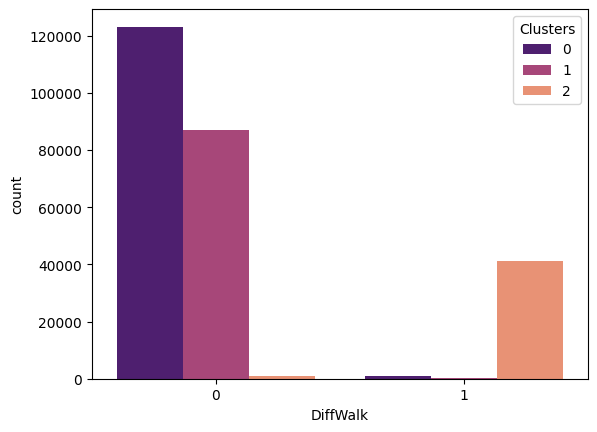

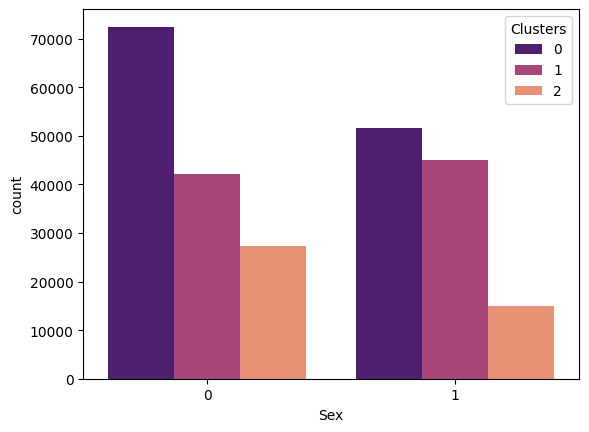

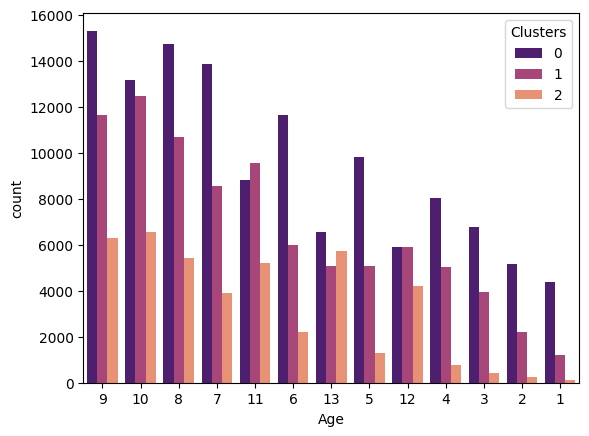

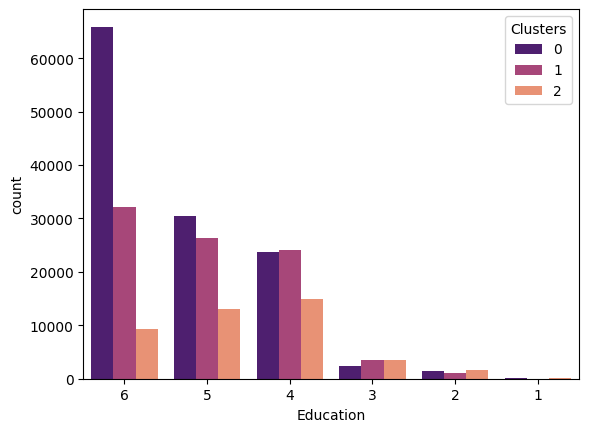

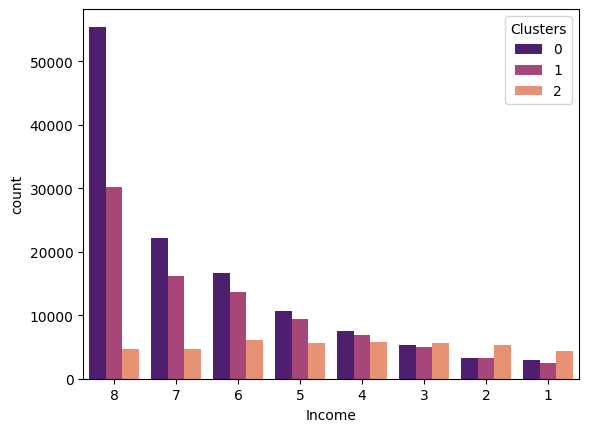

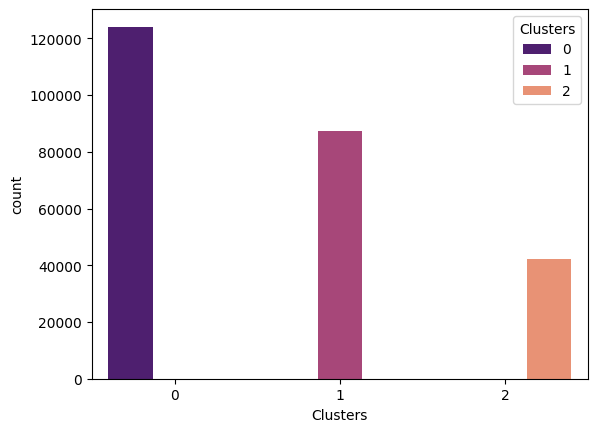

In [16]:
plt.subplots(figsize = (15,5))

for c in data.columns:
    sb.countplot(x = data_with_clusters[c], order = data_with_clusters[c].value_counts().index, hue = data_with_clusters['Clusters'], palette="magma")
    plt.show()